<a href="https://colab.research.google.com/github/LSTM-Team/HDSC-Winter-22-Capstone-Project/blob/production/LSTM_GROUP_PROJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow 
import seaborn as sns
import keras  
import os
import glob 
from skimage import io 
import random 
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=db4ac3bf5c2366482d48911d9e1c8780d958893cb592e2a306b6ff272ae5fed9
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! mkdir "/content/new_dataset"

In [ ]:
 #Connecting Kaggle API for dataset
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 660M/675M [00:04<00:00, 169MB/s]
100% 675M/675M [00:04<00:00, 152MB/s]


In [ ]:
!unzip "/content/cell-images-for-detecting-malaria.zip" -d "/content/new_dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: /content/new_dataset/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: /content/new_dataset/cel

In [ ]:
images = []
labels = []
def train_data(data_folder_path):
    
    dirs = os.listdir(data_folder_path)

    for dir_name in dirs:
     
        label = dir_name
        
        train_image_dir_path = data_folder_path + "/" + dir_name  
        
        train_images_names = os.listdir(train_image_dir_path)

        for image_name in train_images_names:
            
            image_path = train_image_dir_path + "/" + image_name
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(label)


        f,ax = plt.subplots(2,3,figsize=(15,9))
        for i in range(0,6):
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Morphological operation
            kernel = np.ones((5,5),np.uint8)  
            erode_image = cv2.erode(image, kernel, iterations=1)
            dilate_image = cv2.dilate(erode_image, kernel, iterations=1)
            morph = cv2.morphologyEx(dilate_image, cv2.MORPH_OPEN, kernel)
            morph = cv2.morphologyEx(morph, cv2.MORPH_GRADIENT, kernel)

            image = cv2.resize(image, (512,512)) 
            m_image = cv2.resize(morph, (512,512)) 

            res = np.hstack((image,m_image))    # Display 2 images together
            ax[i//3,i%3].imshow(res)
            f.suptitle(label)
        # Just display the Morphological image
            # ax[i//3,i%3].imshow(m_image)
            # f.suptitle(label)
        plt.show()    

    return images, labels

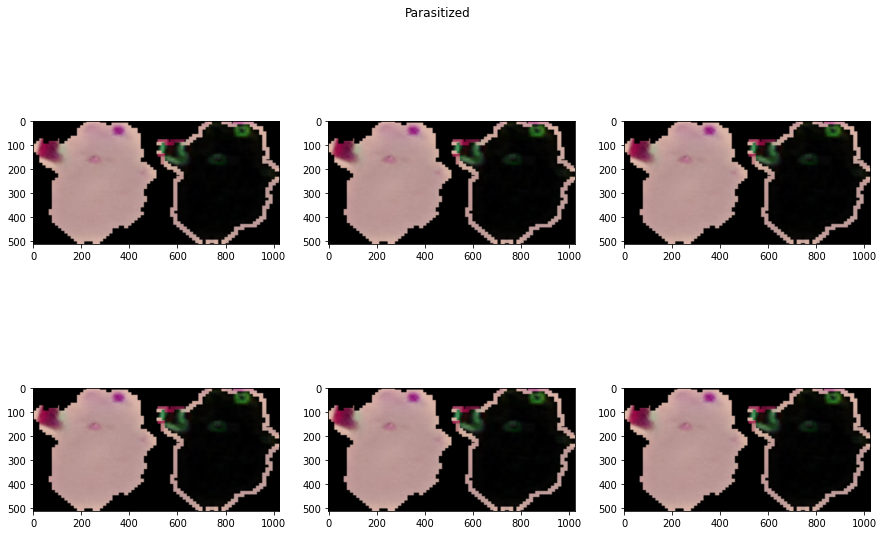

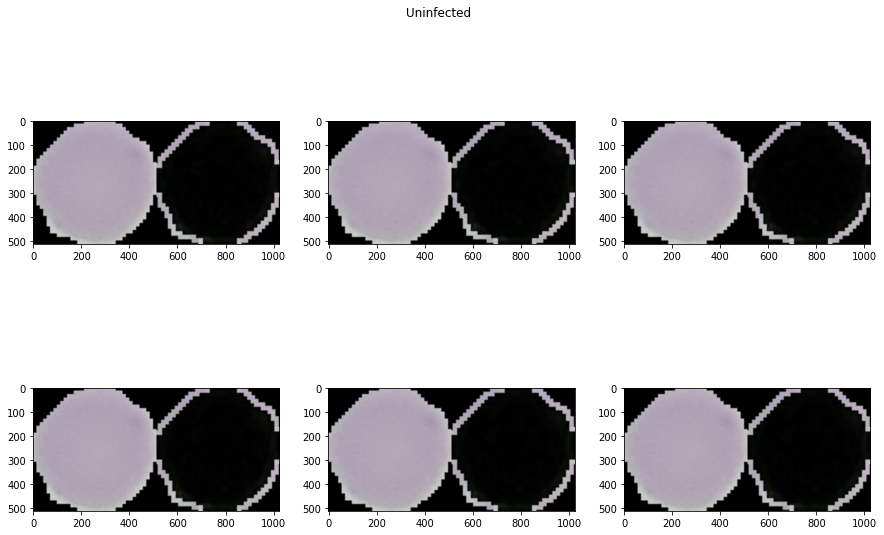

Total number of images:  27560
Total labels:  27560
Name of Classes: ['Parasitized' 'Uninfected']
Parasitized    13780
Uninfected     13780
dtype: int64


In [ ]:
images, labels = train_data("/content/new_dataset/cell_images/cell_images")

print("Total number of images: ", len(images))
print("Total labels: ", len(labels))
print('Name of Classes:', np.unique(np.array(labels)))
print(pd.DataFrame(labels).value_counts())